https://www.kaggle.com/datasets/rohankhoba/porject-1/data?select=dailyActivity_merged.csv

Find the trends among smart devices, how people are using the device and find potential opportunities for growth. What is that new thing that people want to monitor.

    Identify prevailing trends in the usage of smart devices.
    Explore how these trends could be relevant to Bellabeat's customer base.
    Discuss how these trends could potentially increase Bellabeat's marketing strategies.
    Some questions I want to include based on SMART technique:
    • Who’s responsible for it?
    • What steps need to be taken to achieve it?
    • Revenue data, turnover data, performance data for each product.
    • How much time do we need to achieve goals?

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

/tmp/ipykernel_10002/3199333797.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [182]:
df_hours = pd.read_csv('Data/Actividad/Hourly_activity_data.csv')
print(f'{df_hours.shape}')

(46008, 6)


In [115]:
df_hours.duplicated(subset=['ActivityHour', 'Id']).sum()

0

In [86]:
from datetime import datetime
# Converitmos la anotacion de fecha al estandar iso
def transfom_iso(date):
    try:
        dt = datetime.strptime(date, '%m/%d/%Y %H:%M')
    except ValueError:
        dt = datetime.strptime(date, '%m/%d/%Y')
    # Convertir al formato ISO 8601
    iso_format = dt.isoformat()
    return iso_format

In [ ]:
df_hours['ActivityHour'] = df_hours['ActivityHour'].apply(transfom_iso)

In [6]:
print(f'Numero de usuarios: {df_hours["Id"].unique().shape[0]}')
print(f'Numero de muestras: {df_hours.shape[0]}')

Numero de usuarios: 35
Numero de muestras: 46008


# Finalidad:
1. Encotrar patrones de rutina de los usuarios

Primero quiero ver si el tiempor de monitoreo es constante en toda la poblacion.

In [7]:
# Split hours and date fron ActivityHour
df_hours[["Date", 'Hour']] = df_hours['ActivityHour'].str.split("T", expand=True)
# Comprueba si para cada dia se an rejistrado las mismas horas


<Axes: xlabel='Hour'>

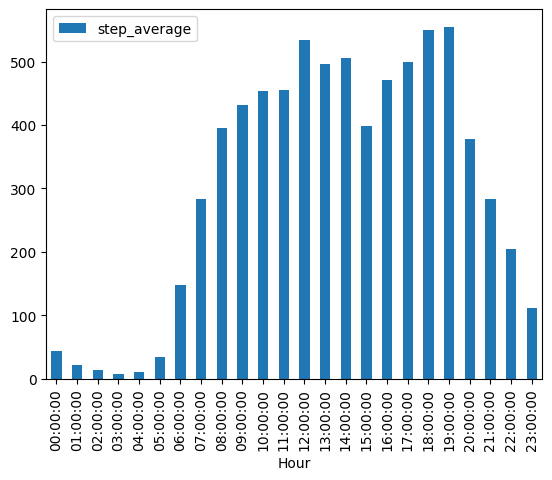

In [8]:
# Calculamos la media del acumulado de pasos por hora para buscar un patron de movimiento.
grouped_hourStep = df_hours.groupby(['Hour'])['StepTotal'].apply(list).reset_index()
grouped_hourStep['step_average'] = grouped_hourStep['StepTotal'].apply(lambda x: sum(x)/len(x))
grouped_hourStep.sort_values("Hour",key=lambda col: col.apply(lambda x: int(x.split(':')[0])), inplace=True)
grouped_hourStep.plot.bar(y='step_average', x='Hour')

<Axes: xlabel='Hour'>

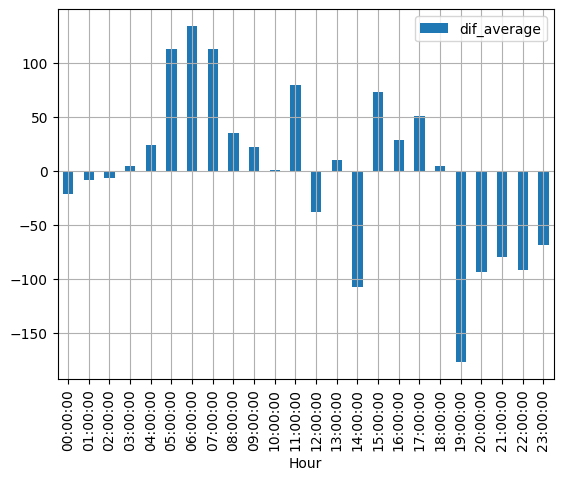

In [42]:
shape_average = grouped_hourStep['step_average'].shape
dif_average = []
for index, average in enumerate(grouped_hourStep['step_average'].to_numpy()):
    dif = grouped_hourStep['step_average'].iloc[(index+1)%shape_average[0]] - average
    dif_average.append(dif)

grouped_hourStep['dif_average'] = dif_average
grouped_hourStep.plot.bar(y='dif_average', x='Hour', grid=True)

Podemos deducir que la mallor actividad se produce de 6:00 a 19:00 con lo que coincide apoximadamente con las salida y puesta del sol. (Suponiendo que la mallor parte de la poblacion se encuentre en el emisferio norte occidental)



### Comprobaremos si este patro es recurrente todos los mese.

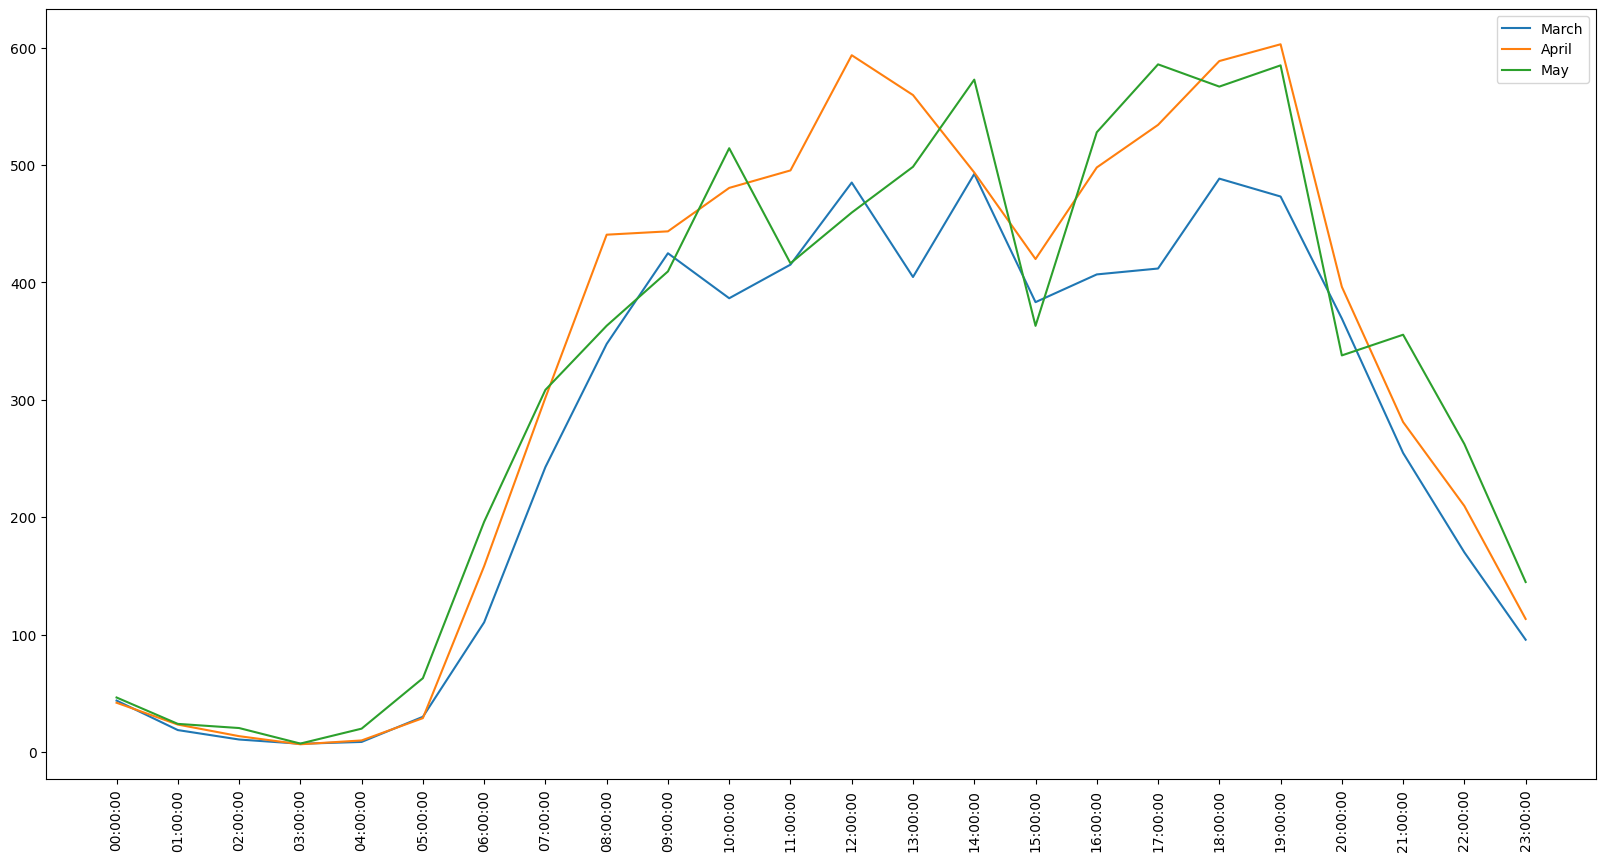

In [33]:
df_hours[['Year', 'Month', 'Day']] = df_hours['Date'].str.split("-", expand=True)
df_hours['Year'] = df_hours['Year'].apply(lambda x: int(x))
df_hours['Month'] = df_hours['Month'].apply(lambda x: int(x))
df_hours['Day'] = df_hours['Day'].apply(lambda x: int(x))

grouped_hourStepMonth = df_hours.groupby(['Hour',"Month"])['StepTotal'].apply(list).reset_index()
grouped_hourStepMonth['step_average'] = grouped_hourStepMonth['StepTotal'].apply(lambda x: sum(x)/len(x))
grouped_hourStepMonth.sort_values("Hour",key=lambda col: col.apply(lambda x: int(x.split(':')[0])), inplace=True)

figure, axis = plt.subplots()

groups = grouped_hourStepMonth["Hour"].unique()

values1 = grouped_hourStepMonth[grouped_hourStepMonth['Month'] == 3]['step_average']
values2 = grouped_hourStepMonth[grouped_hourStepMonth['Month'] == 4]['step_average']
values3 = grouped_hourStepMonth[grouped_hourStepMonth['Month'] == 5]['step_average']

axis.plot(groups, values1, label="March")
axis.plot(groups, values2, label="April")
axis.plot(groups, values3, label="May")
axis.figure.set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.legend()
# plt.show()


### Comprobaremos si este patro es recurrente todos los dias de la semana.

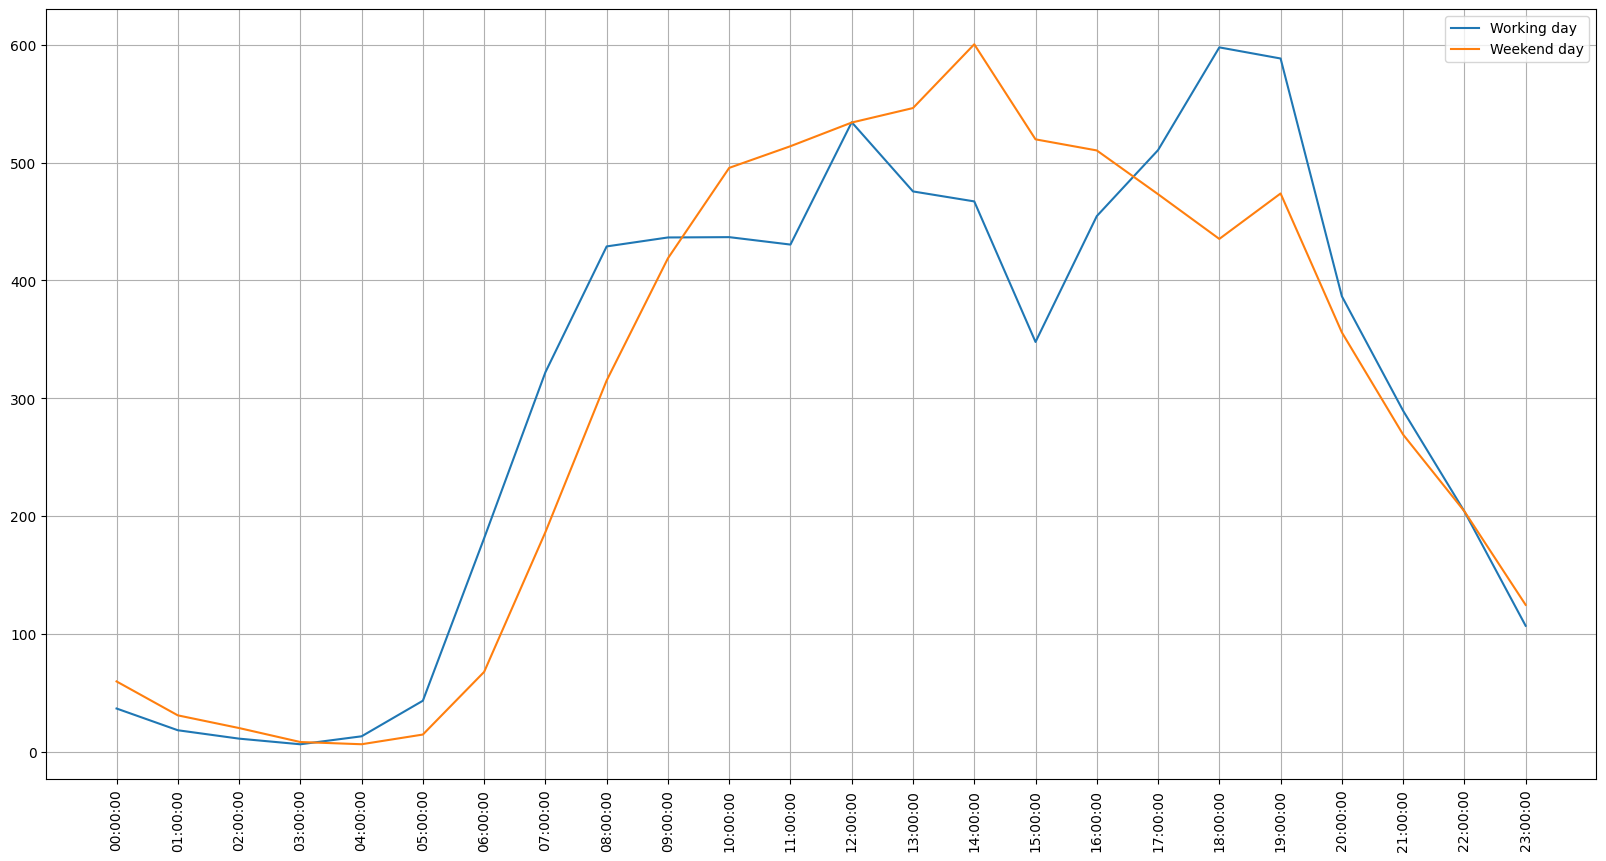

In [43]:
df_hours['Day_week'] = df_hours['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
df_hours['Weekend'] = df_hours['Day_week'].apply(lambda x: x >= 5)

grouped_DayStep = df_hours.groupby(["Hour", 'Weekend'])['StepTotal'].apply(list).reset_index()
grouped_DayStep['step_average'] = grouped_DayStep['StepTotal'].apply(lambda x: sum(x)/len(x))
grouped_DayStep.sort_values("Hour",key=lambda col: col.apply(lambda x: int(x.split(':')[0])), inplace=True)

figure, axis = plt.subplots()

groups = grouped_DayStep["Hour"].unique()

values1 = grouped_DayStep[grouped_DayStep['Weekend'] == False]['step_average']
values2 = grouped_DayStep[grouped_DayStep['Weekend'] == True]['step_average']

axis.plot(groups, values1, label="Working day")
axis.plot(groups, values2, label="Weekend day")
axis.figure.set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.grid()
plt.legend()


/tmp/ipykernel_10002/2485697020.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_DayStepWeekend['dif_average'] = dif_average


<Axes: title={'center': 'Weekend diff average'}, xlabel='Hour'>

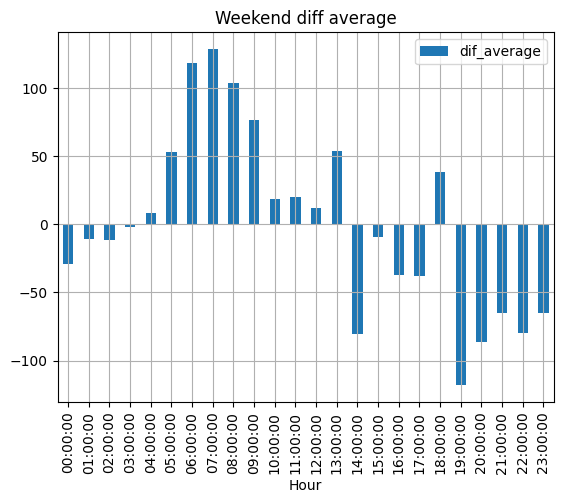

In [39]:
grouped_DayStepWeekend = grouped_DayStep[grouped_DayStep['Weekend'] == True]

shape_average = grouped_DayStepWeekend['step_average'].shape
dif_average = []
for index, average in enumerate(grouped_DayStepWeekend['step_average'].to_numpy()):
    dif = grouped_DayStepWeekend['step_average'].iloc[(index+1)%shape_average[0]] - average
    dif_average.append(dif)

grouped_DayStepWeekend['dif_average'] = dif_average
grouped_DayStepWeekend.plot.bar(y='dif_average', x='Hour', title="Weekend diff average", grid=True)

/tmp/ipykernel_10002/180192425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_DayStepWeekend['dif_average'] = dif_average


<Axes: title={'center': 'No weekend diff average'}, xlabel='Hour'>

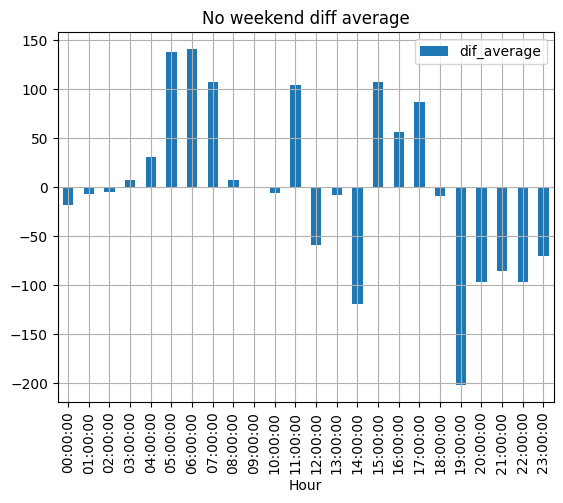

In [41]:
grouped_DayStepWeekend = grouped_DayStep[grouped_DayStep['Weekend'] == False]

shape_average = grouped_DayStepWeekend['step_average'].shape
dif_average = []
for index, average in enumerate(grouped_DayStepWeekend['step_average'].to_numpy()):
    dif = grouped_DayStepWeekend['step_average'].iloc[(index+1)%shape_average[0]] - average
    dif_average.append(dif)

grouped_DayStepWeekend['dif_average'] = dif_average
grouped_DayStepWeekend.plot.bar(y='dif_average', x='Hour', title="No weekend diff average", grid=True)

Se puede observar como mientras, los dias entre semana se mantine la tenddencia vista en la media generar, durante los fines de semana, se nota un desplazamiento de una hora en el momento mallor incrementos de pasos. Tambien notamos como durante los fines de semana el la media de pasos por hora tiene una curba mas sube llegando a su maximo a las 14:00. 
Si conocer la localizacion de los datos no puedo asegurar que esto correspondan a orarios comerciales de un pais concreto.

No obstante si escierto que los fines de semana la poblacion de estudio compienza su actividad una ora mas tarde y a diferencia de los dias laborables, los fines de semana la curbatura es mas constante por lo que suponiendo que las oras encajen en el orario comercial de un pais, por el monmento me atreberia a intuir que la poblacion de estudio son perosan cullo trabajo no requiere un desplazamiento continuo.

Esto podremos refuterlo estudiando la intensida de la actividad mas adelante.

In [ ]:
# def compare_hours(list_hours):
#     flag = sorted(list_hours) == sorted(df_hours['Hour'].unique())
#     # if not flag:
#     #     print('---------------------------------------------')
#     #     print(sorted(list_hours))
#     #     print(sorted(df_hours['Hour'].unique()))
#     return flag

# grouped = df_hours.groupby(['Id', 'Date'])['Hour'].apply(list).reset_index()
# grouped['Same_hours'] = grouped['Hour'].apply(compare_hours)
# not_complet = grouped[grouped['Same_hours']==False].shape[0]
# print(f'Existen un total de {not_complet} entradas que no completan las 24H')

Existen un total de 44 entradas que no completan las 24H


# Estudio de la intensida de las actividades.

In [180]:
df_intensiti = pd.read_csv('Data/Actividad/dailyActivity_merged.csv')
print(f'{df_intensiti.shape}')
df_intensiti["ActivityDate"] = df_intensiti["ActivityDate"].apply(lambda x: transfom_iso(x).split('T')[0])
df_intensiti.sort_values("ActivityDate", inplace=True)
df_intensiti[['Year', 'Month', 'Day']] = df_intensiti['ActivityDate'].str.split("-", expand=True)
df_intensiti['Year'] = df_intensiti['Year'].apply(lambda x: int(x))
df_intensiti['Month'] = df_intensiti['Month'].apply(lambda x: int(x))
df_intensiti['Day'] = df_intensiti['Day'].apply(lambda x: int(x))

(1397, 15)


In [171]:
print(df_intensiti.duplicated(subset=['ActivityDate', 'Id']).sum())
# Remove duplicate
df_intensiti.drop(df_intensiti[df_intensiti.duplicated(subset=['ActivityDate', 'Id'])].index, inplace=True)

24


Por el momento bamos a eliminar todas aquellas entradas que no allan dando un solo paso en todo el dia, ya que esto lo veo biolojicamente imposibel, y que tiende mas al avandono del dispositibo.

In [198]:
df_intensiti_clean = df_intensiti.drop(df_intensiti[df_intensiti['TotalSteps']==0].index)

In [199]:
# Intensidad por dia del mes
df_intensiti_clean['Day_week'] = df_intensiti_clean['ActivityDate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
df_intensiti_clean['Weekend'] = df_intensiti_clean['Day_week'].apply(lambda x: x >= 5)




In [204]:
df_intensiti_clean[df_intensiti_clean['Id'] == 4445114986][['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']]

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
692,0,0,155,807
693,0,0,163,1277
694,0,0,238,786
695,0,0,205,898
696,0,0,273,672
697,0,0,171,1269
698,0,0,110,1330
699,1,6,235,702
700,28,2,215,745
701,24,1,208,939


In [200]:

group_min_activity = df_intensiti_clean.groupby(['Id'])['VeryActiveMinutes'].apply(list).reset_index()
group_min_activity['VeryActiveMinutes_average'] = group_min_activity['VeryActiveMinutes'].apply(lambda x: sum(x)/len(x))
group_min_activity
# group_min_activity.sort_values('Day', inplace=True)
# group_min_activity.plot.bar(y='VeryActiveMinutes_average', x='Day', grid=True, title='VeryActiveMinutes_average')

,Id,VeryActiveMinutes,VeryActiveMinutes_average
0,1503960366,"[33, 89, 56, 39, 28, 30, 33, 47, 40, 15, 43, 3...",38.387755
1,1624580081,"[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.660000
2,1644430081,"[0, 34, 59, 4, 5, 18, 3, 7, 18, 0, 2, 30, 5, 3...",10.875000
3,1844505072,"[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0.433333
4,1927972279,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.413793
5,2022484408,"[72, 0, 25, 62, 36, 47, 72, 40, 44, 1, 41, 42,...",37.348837
6,2026352035,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",0.069767
7,2320127002,"[0, 0, 0, 0, 1, 0, 10, 0, 13, 0, 0, 0, 0, 0, 0...",1.358974
8,2347167796,"[2, 21, 0, 0, 51, 0, 21, 18, 14, 15, 2, 16, 12...",13.125000
9,2873212765,"[0, 0, 3, 6, 0, 0, 5, 0, 46, 1, 0, 2, 0, 0, 0,...",11.857143


<Axes: title={'center': 'SedentaryMinutes_average'}, xlabel='Day'>

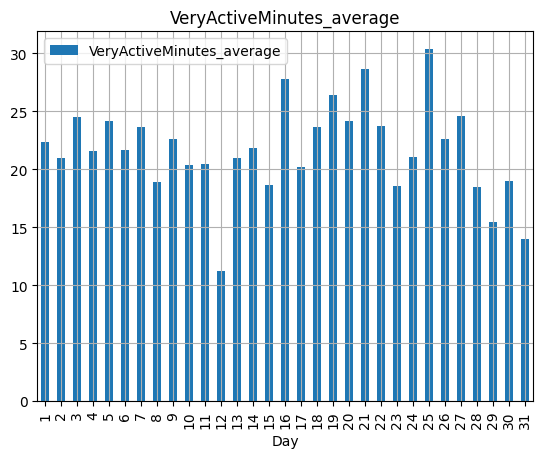

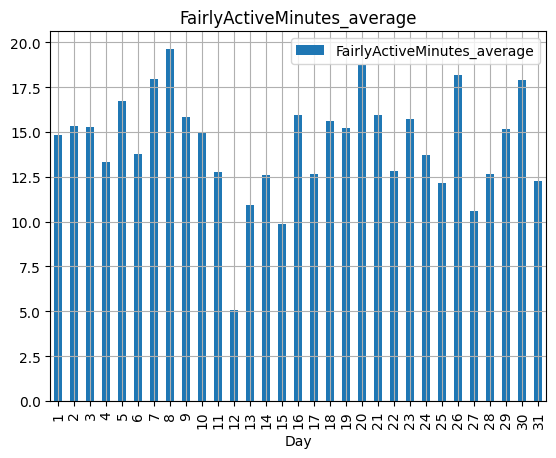

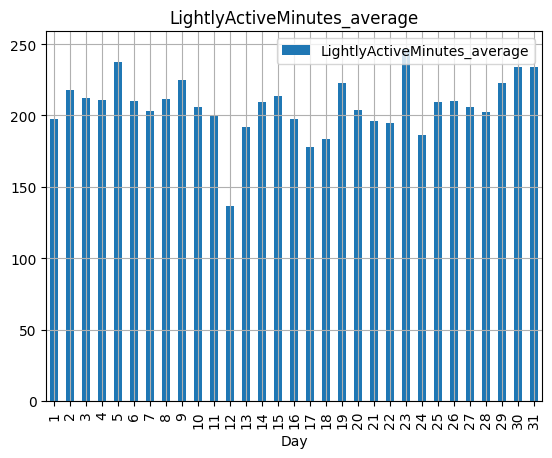

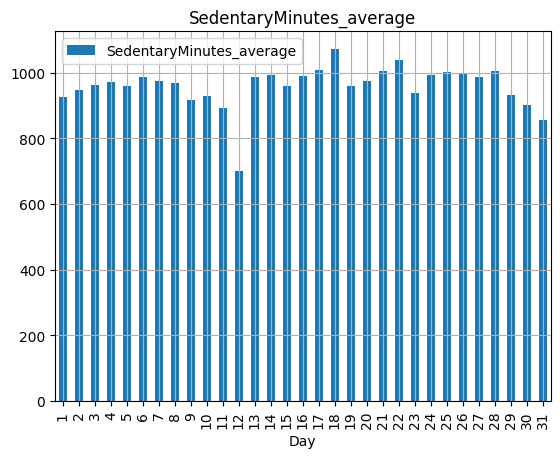

In [192]:
# VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes

group_min_activity = df_intensiti_clean.groupby(['Id'])['VeryActiveMinutes'].apply(list).reset_index()
group_min_activity['VeryActiveMinutes_average'] = group_min_activity['VeryActiveMinutes'].apply(lambda x: sum(x)/len(x))
group_min_activity.sort_values('Day', inplace=True)
group_min_activity.plot.bar(y='VeryActiveMinutes_average', x='Day', grid=True, title='VeryActiveMinutes_average')

group_min_activity = df_intensiti_clean.groupby(['Day'])['FairlyActiveMinutes'].apply(list).reset_index()
group_min_activity['FairlyActiveMinutes_average'] = group_min_activity['FairlyActiveMinutes'].apply(lambda x: sum(x)/len(x))
group_min_activity.sort_values('Day', inplace=True)
group_min_activity.plot.bar(y='FairlyActiveMinutes_average', x='Day', grid=True, title='FairlyActiveMinutes_average')

group_min_activity = df_intensiti_clean.groupby(['Day'])['LightlyActiveMinutes'].apply(list).reset_index()
group_min_activity['LightlyActiveMinutes_average'] = group_min_activity['LightlyActiveMinutes'].apply(lambda x: sum(x)/len(x))
group_min_activity.sort_values('Day', inplace=True)
group_min_activity.plot.bar(y='LightlyActiveMinutes_average', x='Day', grid=True, title='LightlyActiveMinutes_average')

group_min_activity = df_intensiti_clean.groupby(['Day'])['SedentaryMinutes'].apply(list).reset_index()
group_min_activity['SedentaryMinutes_average'] = group_min_activity['SedentaryMinutes'].apply(lambda x: sum(x)/len(x))
group_min_activity.sort_values('Day', inplace=True)
group_min_activity.plot.bar(y='SedentaryMinutes_average', x='Day', grid=True, title='SedentaryMinutes_average')

In [186]:
group_min_activity['Day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [175]:
df_intensiti_clean["Total_minuts_activity"] = df_intensiti_clean[["VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes"]].sum(axis=1)
group_min_activity = df_intensiti_clean.groupby(['Year', 'Month', 'Day'])['Total_minuts_activity'].apply(list).reset_index()
group_min_activity['time_activity_average'] = group_min_activity['Total_minuts_activity'].apply(lambda x: sum(x)/len(x))



In [185]:
group_min_activity[group_min_activity['Month']<5]

,Year,Month,Day,Total_minuts_activity,time_activity_average
0,2016,3,12,[254],254.000000
1,2016,3,13,[136],136.000000
2,2016,3,14,"[172, 145]",158.500000
3,2016,3,15,[225],225.000000
4,2016,3,16,"[43, 348]",195.500000
5,2016,3,17,[47],47.000000
6,2016,3,18,"[34, 0]",17.000000
7,2016,3,19,[0],0.000000
8,2016,3,20,"[2, 0]",1.000000
9,2016,3,21,"[46, 0]",23.000000


In [ ]:
grouped_hourStep = df_hours.groupby(['Hour'])['StepTotal'].apply(list).reset_index()
grouped_hourStep['step_average'] = grouped_hourStep['StepTotal'].apply(lambda x: sum(x)/len(x))
grouped_hourStep.sort_values("Hour",key=lambda col: col.apply(lambda x: int(x.split(':')[0])), inplace=True)

In [161]:
df_intensiti_clean[df_intensiti_clean[['LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance']].sum(axis=1)==6.199999999999999]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_minuts,Total_intensity,IntensityByTime
576,4057192912,2016-03-14,8433,6.2,6.2,0.0,2.5,0.3,3.4,0.0,30,7,135,1268,2453,1440,6.2,0.004306
782,4702921684,2016-03-30,7583,6.2,6.2,0.0,0.3,0.6,5.3,0.0,3,13,227,742,2915,985,6.2,0.006294
1216,8253242879,2016-04-16,9256,6.1,6.1,0.0,0.4,3.3,2.5,0.0,6,51,115,1268,1880,1440,6.2,0.004306
889,5577150313,2016-04-20,8330,6.2,6.2,0.0,4.1,0.3,1.8,0.0,87,16,113,773,3192,989,6.2,0.006269
736,4445114986,2016-05-11,9105,6.1,6.1,0.0,2.3,1.0,2.9,0.0,34,22,232,622,2499,910,6.2,0.006813


In [156]:
df_intensiti_clean.groupby(['ActiveDistance'])['Total_minuts'].apply(list).reset_index()
df_intensiti_clean.groupby(['ActivityDate'])['Total_intensity'].apply(list).reset_index()


,ActivityDate,Total_intensity
0,2016-03-12,[4.0]
1,2016-03-13,[2.3]
2,2016-03-14,"[6.199999999999999, 2.1]"
3,2016-03-15,[4.2]
4,2016-03-16,"[1.6, 9.0]"
...,...,...
57,2016-05-08,"[9.100000000000001, 2.8, 4.0, 17.7, 2.3, 7.2, ..."
58,2016-05-09,"[4.7, 7.8, 7.0, 6.699999999999999, 3.2, 9.1, 3..."
59,2016-05-10,"[5.6, 10.7, 8.8, 7.8, 10.3, 3.9, 4.2, 4.2, 8.2..."
60,2016-05-11,"[3.2, 2.5999999999999996, 7.8, 6.1, 9.3, 19.5,..."


In [149]:
df_intensiti_clean["Total_intensity"] = df_intensiti_clean[['LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance']].sum(axis=1)
df_intensiti_clean["Total_minuts"] = df_intensiti_clean[["VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes"]].sum(axis=1)
grouped_hourStep = 
df_intensiti_clean["IntensityByTime"] = df_intensiti_clean["Total_intensity"]/df_intensiti_clean["Total_minuts"]

In [151]:
df_intensiti_clean["IntensityByTime"]

511     0.003956
512     0.002536
576     0.004306
513     0.001826
514     0.003822
          ...   
1273    0.006557
354     0.001879
311     0.008172
1076    0.010000
1396    0.006552
Name: IntensityByTime, Length: 1237, dtype: float64

<Axes: xlabel='ActivityDate'>

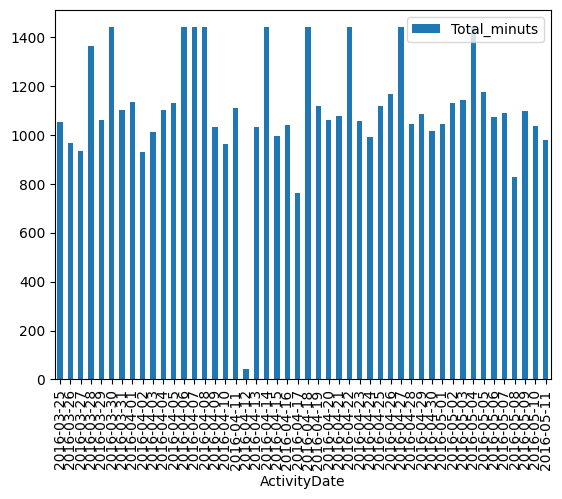

In [148]:

df_intensiti_clean[df_intensiti_clean['Id'] == 1503960366].plot.bar(y='Total_minuts', x='ActivityDate')

<Axes: xlabel='ActivityDate'>

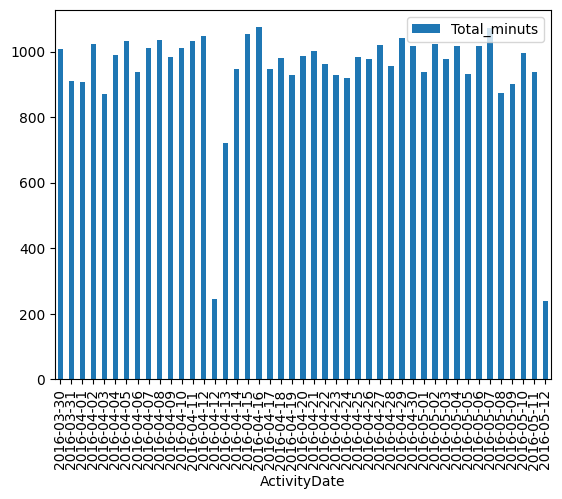

In [100]:
df_intensiti[df_intensiti['Id'] == 6962181067].plot.bar(y='Total_minuts', x='ActivityDate')

# WIP